### DESCRIPTION

Comcast is an American global telecommunication company. The firm has been providing terrible customer service. They continue to fall short despite repeated promises to improve. Only last month (October 2016) the authority fined them a $2.3 million, after receiving over 1000 consumer complaints.
The existing database will serve as a repository of public customer complaints filed against Comcast.
It will help to pin down what is wrong with Comcast's customer service.

### Analysis Task

To perform these tasks, you can use any of the different Python libraries such as NumPy, SciPy, Pandas, scikit-learn, matplotlib, and BeautifulSoup.

- Import data into Python environment.
- Provide the trend chart for the number of complaints at monthly and daily granularity levels.
- Provide a table with the frequency of complaint types.

Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
- Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
- Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3. 
- Provide insights on: 
  - Which state has the maximum complaints
  - Which state has the highest percentage of unresolved complaints
- Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.

The analysis results to be provided with insights wherever applicable

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importing the Dataset 
Path = "/content/drive/MyDrive/Colab Notebooks/SimipliLearn Projects/Project_01/Comcast_telecom_complaints_data.csv"
df = pd.read_csv(Path)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2224 entries, 0 to 2223
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Date_month_year              2224 non-null   object
 4   Time                         2224 non-null   object
 5   Received Via                 2224 non-null   object
 6   City                         2224 non-null   object
 7   State                        2224 non-null   object
 8   Zip code                     2224 non-null   int64 
 9   Status                       2224 non-null   object
 10  Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(10)
memory usage: 191.2+ KB


In [3]:
df.describe(include="all")

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
count,2224,2224,2224,2224,2224,2224,2224,2224,2224.000000,2224,2224
unique,2224,1841,91,91,2190,2,928,43,NaN,4,2
top,250635,Comcast,24-06-15,24-Jun-15,12:41:14 PM,Customer Care Call,Atlanta,Georgia,NaN,Solved,No
freq,1,83,218,218,2,1119,63,288,NaN,973,2021
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47994.393435,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28885.279427,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1075.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30056.500000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37211.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,77058.750000,NaN,NaN


In [4]:
df.head()

,Ticket #,Customer Complaint,Date,Date_month_year,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
0,250635,Comcast Cable Internet Speeds,22-04-15,22-Apr-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,04-08-15,04-Aug-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,18-04-15,18-Apr-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,05-Jul-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,26-05-15,26-May-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


## Data Wrangling
- Handling Mislabeled feature columns, Errors & Irrelevant Observations
- Handling Data type based  upon Data Character
- Missing Value Treatment
- Handling Outliers


#### 1.Handling Mislabeled feature Columns,Error and Irrelevant Observations

In [5]:
# Removing unwanted spaces and introducing a homogenous formate for Column labels
## function to fix the mislabled columns
def fix_labels(array):
  new_label_array =[]
  for label in array:
    label_without_special_character=label.replace('#','')
    label_without_spaces = label_without_special_character.strip()
    label_without_underscore = label_without_spaces.replace(" ","_")
    new_label_array.append(label_without_underscore)
  return new_label_array
 
df.columns=fix_labels(df.columns)
df.columns


Index(['Ticket', 'Customer_Complaint', 'Date', 'Date_month_year', 'Time',
       'Received_Via', 'City', 'State', 'Zip_code', 'Status',
       'Filing_on_Behalf_of_Someone'],
      dtype='object')

In [6]:
# Removing Date_month_year column as its similar to Date Column 
df.drop("Date_month_year", axis=1, inplace=True)

In [26]:
# Checking  and Fixing Typos in Catagorical features ( city and State)
df["State"]=df["State"].str.upper()

#### 2.Handling Data type based upon Data Character

In [18]:
# Changing Date into Date-time formate
df["Date"] = pd.to_datetime(df["Date"])

# changing Time into Date-Time formate 
df["Time"]=pd.to_datetime(df['Time'])
df["Time"]=[time.time() for time in df['Time']]
df.head()

,Ticket,Customer_Complaint,Date,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,13:25:26,Internet,Acworth,Georgia,30101,Solved,No


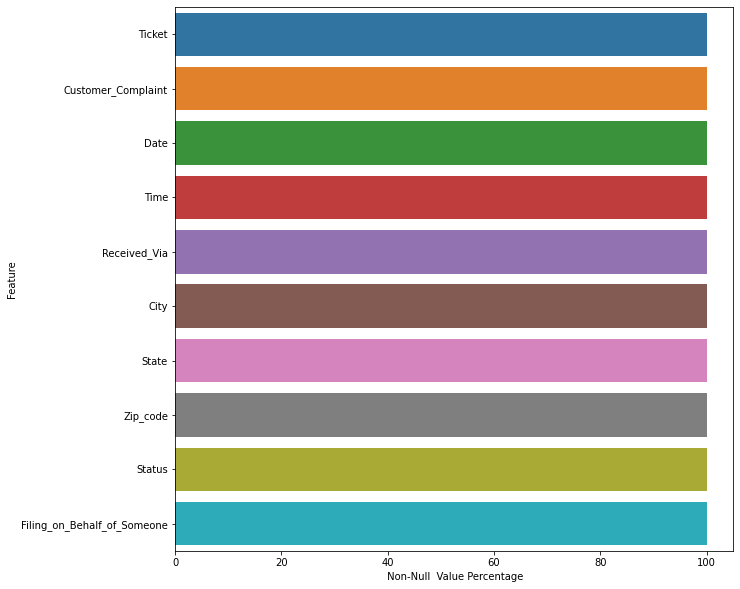

In [19]:
# Missing Value Count
missing_data_stats = df.notnull().count()/df.count()*100
plt.figure(figsize=(10,10))
sns.barplot(y=missing_data_stats.index, x = missing_data_stats.values)
plt.xlabel(" Non-Null  Value Percentage")
plt.ylabel("Feature")
plt.show()

In [20]:
df.describe(include="all")
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


,Ticket,Customer_Complaint,Date,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,13:25:26,Internet,Acworth,Georgia,30101,Solved,No


## Analysis Task -1
1a. Provide the trend chart for the number of complaints at monthly and daily granularity levels.

In [21]:
df.head()

,Ticket,Customer_Complaint,Date,Time,Received_Via,City,State,Zip_code,Status,Filing_on_Behalf_of_Someone
0,250635,Comcast Cable Internet Speeds,2015-04-22,15:53:50,Customer Care Call,Abingdon,Maryland,21009,Closed,No
1,223441,Payment disappear - service got disconnected,2015-04-08,10:22:56,Internet,Acworth,Georgia,30102,Closed,No
2,242732,Speed and Service,2015-04-18,09:55:47,Internet,Acworth,Georgia,30101,Closed,Yes
3,277946,Comcast Imposed a New Usage Cap of 300GB that ...,2015-05-07,11:59:35,Internet,Acworth,Georgia,30101,Open,Yes
4,307175,Comcast not working and no service to boot,2015-05-26,13:25:26,Internet,Acworth,Georgia,30101,Solved,No


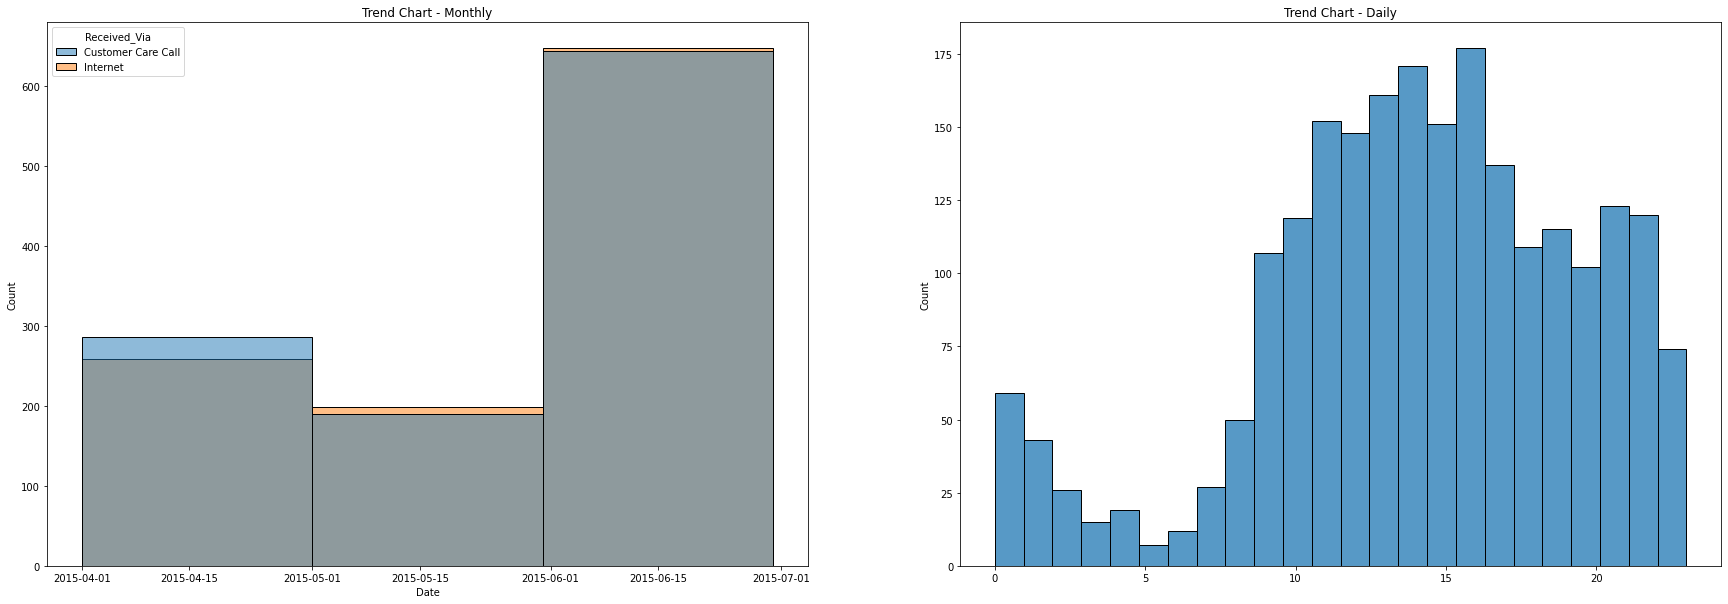

In [22]:
plt.figure(figsize=(30,10))
plt.subplot(1,2,1)
sns.histplot(x= "Date",bins=3,hue="Received_Via",data = df)
plt.title("Trend Chart - Monthly")

plt.subplot(1,2,2)
hour_list = [t.hour for t in df["Time"]]
bins = [0,6,12,18,24]
sns.histplot(hour_list,bins=24)
plt.title("Trend Chart - Daily")

plt.show()

## Analysis Task - 2
1b. Provide a table with the frequency of complaint types.

In [23]:
df["Customer_Complaint"].str.upper()
df["Customer_Complaint"].value_counts()

Comcast                                          83
Comcast Internet                                 18
Comcast Data Cap                                 17
comcast                                          13
Comcast Billing                                  11
                                                 ..
Improper Billing and non resolution of issues     1
Deceptive trade                                   1
intermittent internet                             1
Internet Speed on Wireless Connection             1
Comcast, Ypsilanti MI Internet Speed              1
Name: Customer_Complaint, Length: 1841, dtype: int64

## Analysis Task - 3
1. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.
2. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.
3. Provide insights on:
  - 3a Which state has the maximum complaints
  - 3b Which state has the highest percentage of unresolved complaints
  - 3c Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.


##### 1. Create a new categorical variable with value as Open and Closed. Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed.


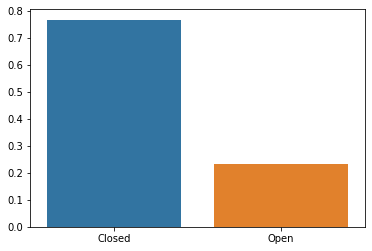

In [24]:
df["Open_Closed"]=df["Status"]
df["Open_Closed"].replace({"Pending":"Open","Solved":"Closed"}, inplace=True)
open_close_percentage = df["Open_Closed"].value_counts()/df["Open_Closed"].count()
sns.barplot(x=open_close_percentage.index, y =open_close_percentage.values )

##### 2. Provide state wise status of complaints in a stacked bar chart. Use the categorized variable from Q3.

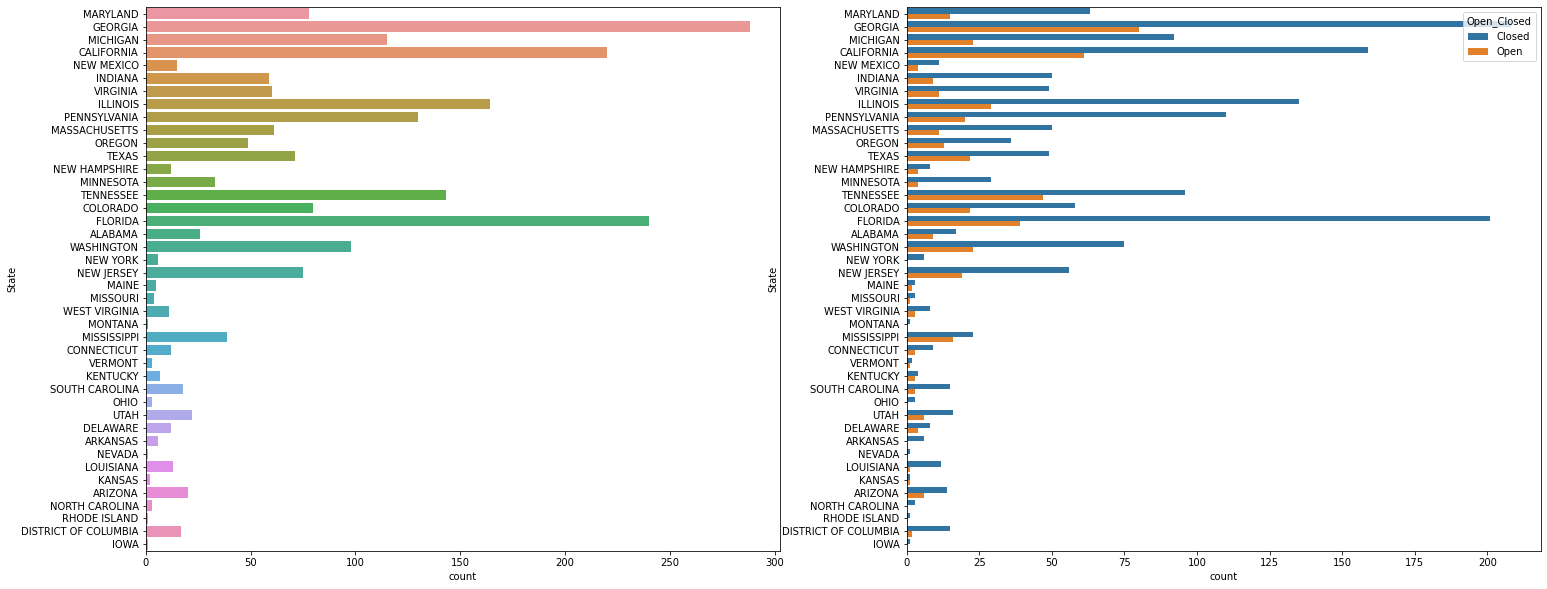

In [76]:
plt.figure(figsize=(25,10))
plt.subplot(1,2,1)
sns.countplot(y=df["State"])
plt.subplot(1,2,2)
sns.countplot(y=df["State"],hue=df["Open_Closed"])
plt.show()

In [75]:
# checking the Percentage of Unresolved complaint 
grouped = df[(df["Open_Closed"]=="Open") & (df["State"]=="GEORGIA")]
grouped.State.value_counts()/ len(df[df["Open_Closed"]=="Open"])*100

GEORGIA    15.473888
Name: State, dtype: float64

##### Conclusion 
From the Above chart , the drawn conclusion are as follows:
 <br>3a and 3b. Georgia is the State  where the  number of complaints and the  unresolved complaint is also maximum  with close to 15.48 % of the over open cases

In [84]:
# Filtering the dataframe based upon Open_Closed Status
Open_closed_Received_Via = df.groupby(["Received_Via","Open_Closed",]).agg({"Open_Closed":["count"]})
Received_Via= df.groupby(["Received_Via"]).agg({"Open_Closed":["count"]})
Open_closed_Received_Via.div(Received_Via,level="Received_Via")*100

Open_Closed
                                     count
Received_Via       Open_Closed            
Customer Care Call Closed        77.211796
                   Open          22.788204
Internet           Closed        76.289593
                   Open          23.710407

#### Concluison

3c .Based upon the above table ,it can be concluded that 77.21% cases are solved which were received via Customer Care Call and 76.29% solved which were received via telephone